 **In hospital mortality for heart failure (HF) patients in the Intensive Care Unit (ICU)**

**Group 3**

*Atharva Kulkarni (ak5070),  Divya Tadimeti (dt2760), Xiaoyi Zhou (xz3126),  Yolanda Zhu (xz3013),  Yu Yen Liu (cl4202)*

In this notebook, we identify and study trends in the data. Moreover, we perform Exploratory Data analysis and visualization on the data.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/sample_data/data01.csv')

In [ ]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

# Initial Analysis of the data

In [ ]:
df.drop(["group", "ID"], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

<Axes: >

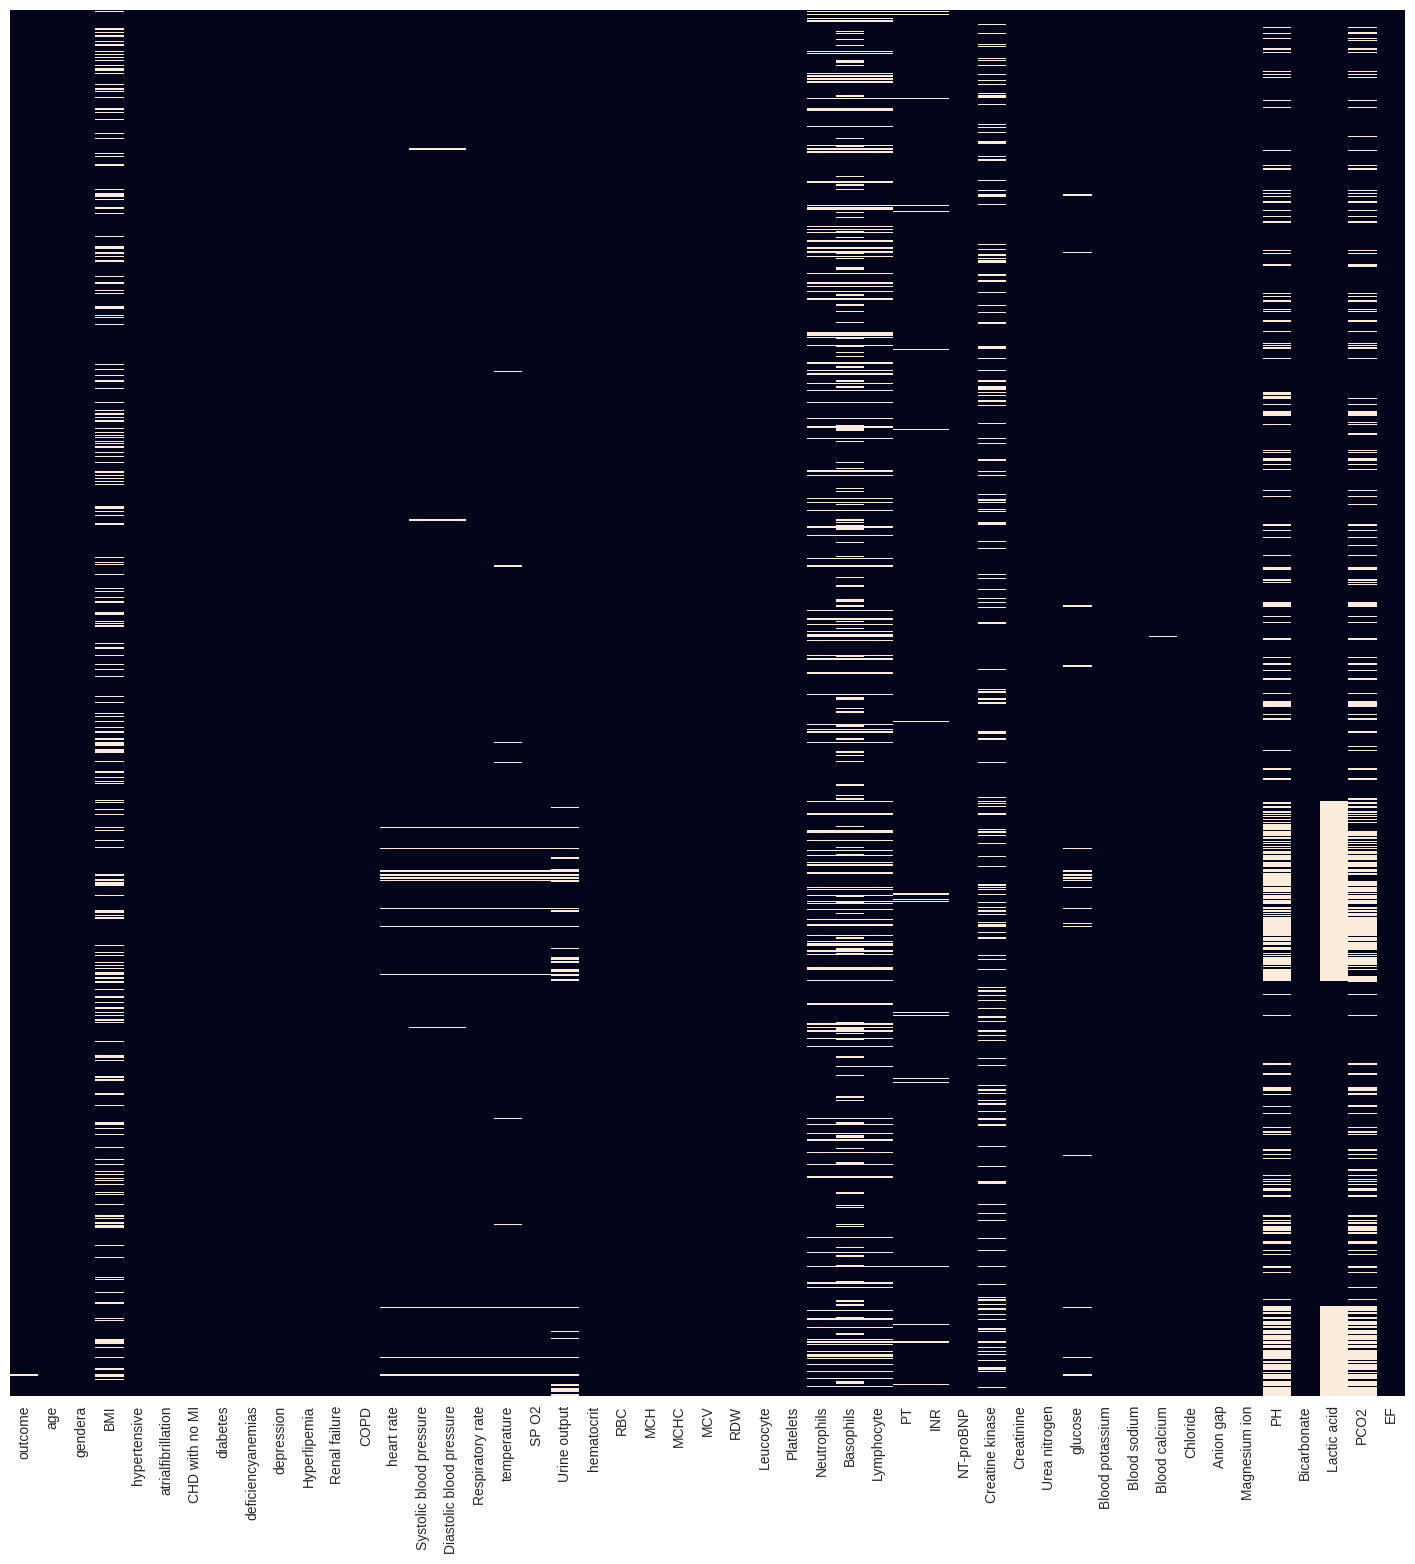

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar =False)

<Axes: >

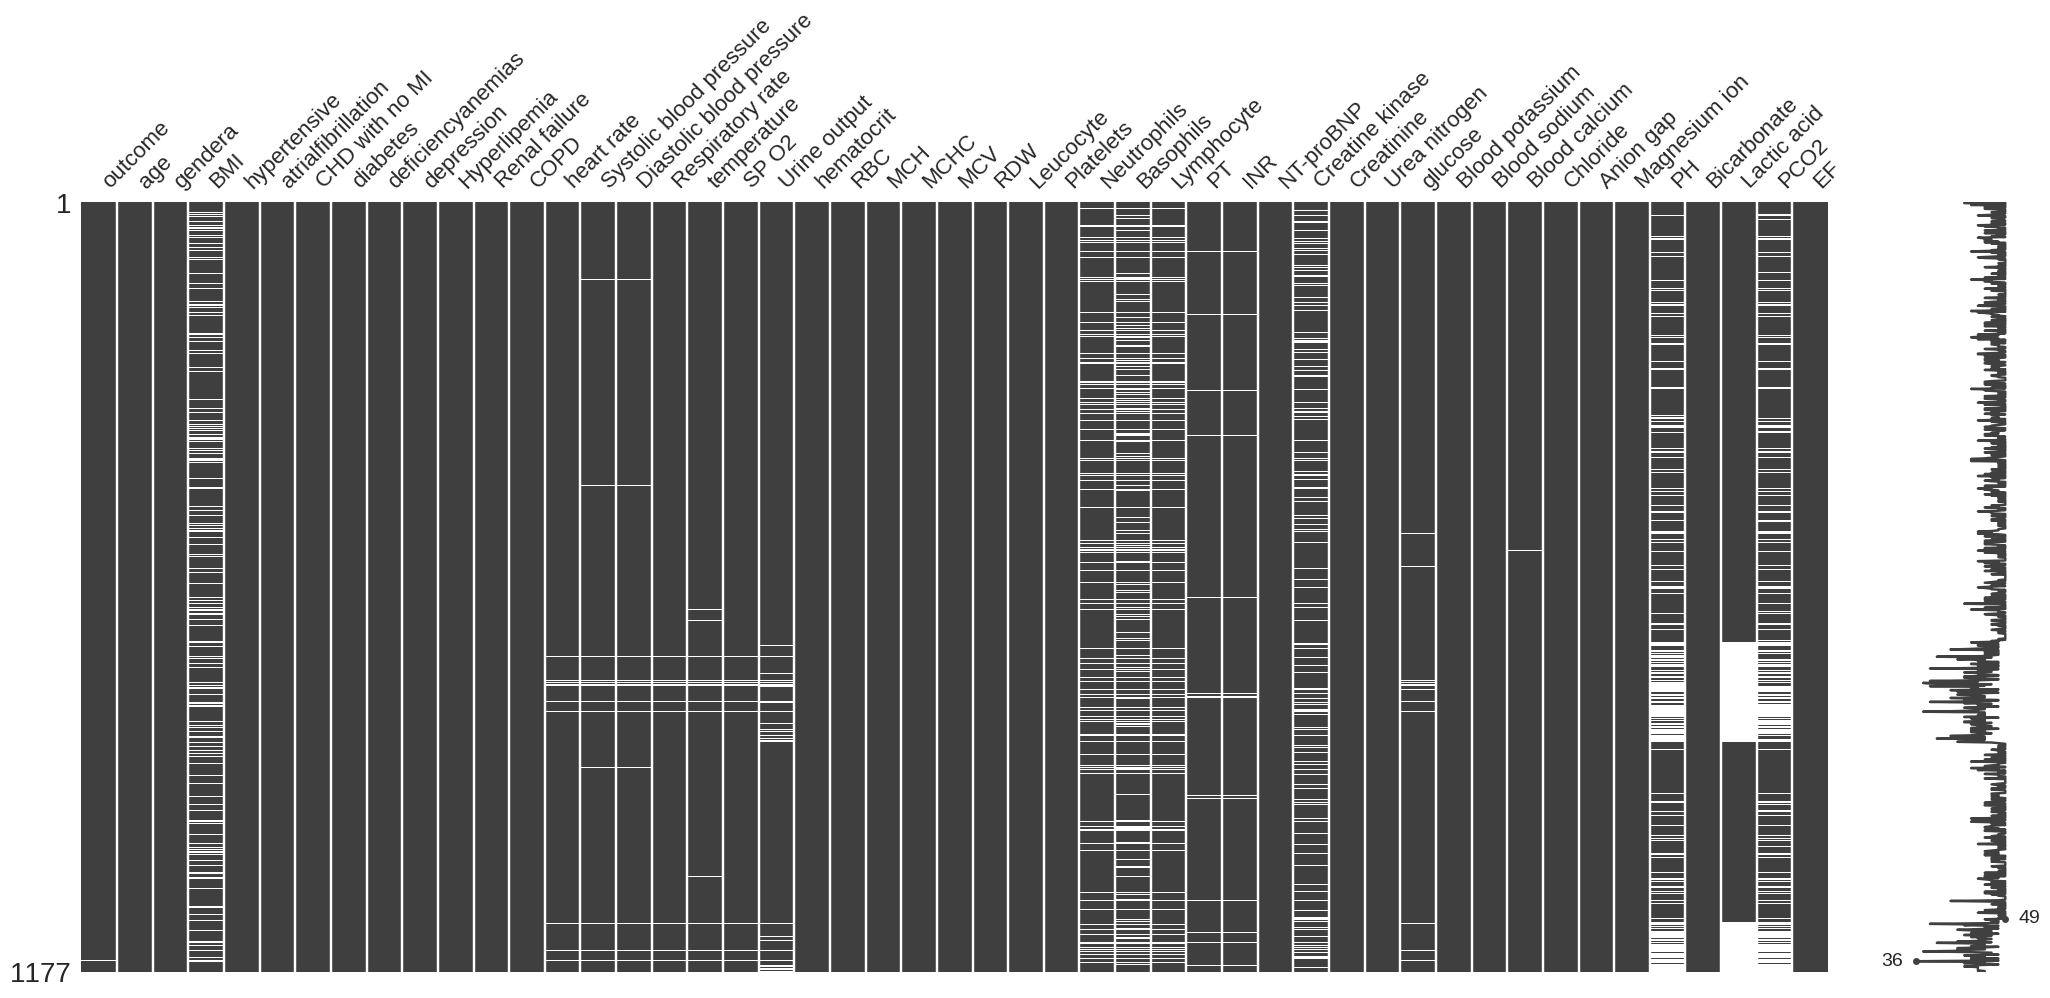

In [ ]:
msno.matrix(df)

In [ ]:
#Check the columns have 25% missing values
drop_col = df.isnull().sum()[df.isnull().sum()>(0.25*df.shape[0])]
drop_col

Series([], dtype: int64)

In [ ]:
#impute missing values
#impute the floating and int values with mean values
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = 'mean')
float_col = df.select_dtypes(include='float64').columns
si.fit(df[float_col])
df[float_col] = si.transform(df[float_col])

In [ ]:
X = df.drop(columns ='outcome')
y = df[['outcome']]
si2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
si2.fit_transform(y)
y = pd.DataFrame(y, columns =['outcome'], dtype='int64')
df_final = X.copy()
df_final['outcome'] = y
df_final.isnull().sum()

age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP                   0
Creatine k

# Performing EDA

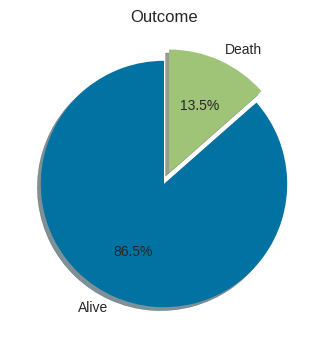

In [ ]:
#Visulaize the dependent variable using pie chart
plt.rcParams['font.size'] = 10.0
plt.rcParams['figure.figsize'] = (4,4)
plt.pie(df_final['outcome'].value_counts(),labels=['Alive','Death'],autopct='%1.1f%%',shadow=True,explode=(0,0.1),startangle=90)
plt.title('Outcome')
plt.show()

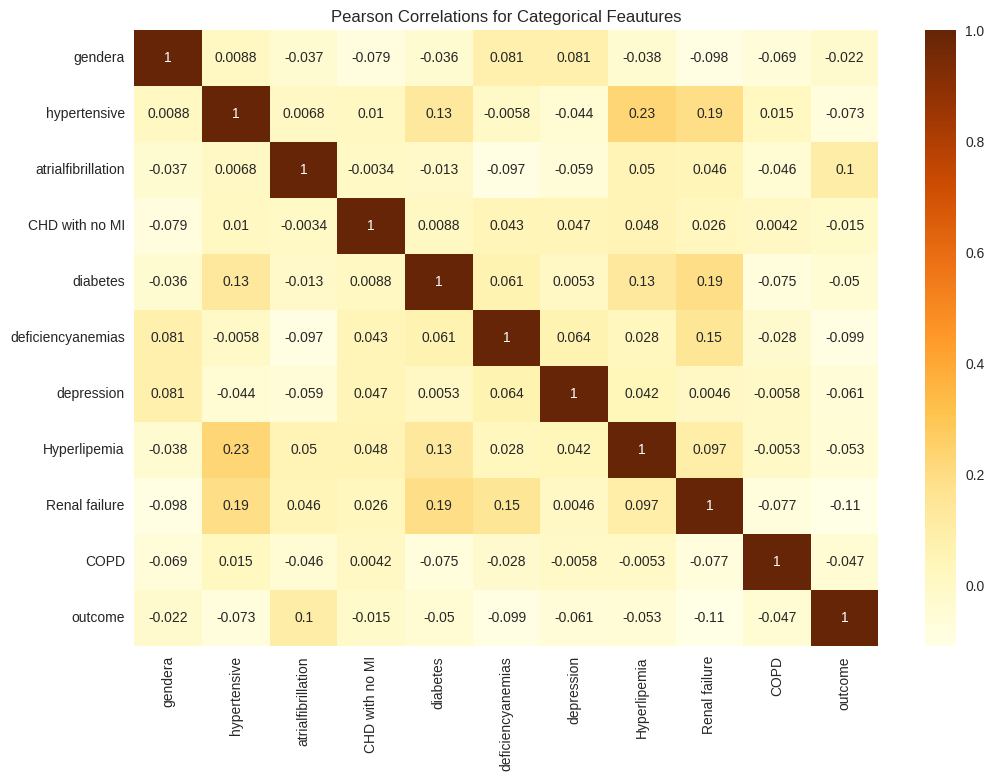

In [ ]:
col = [ 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']
corr = df_final[col].corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr, annot=True,  cmap='YlOrBr',annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title('Pearson Correlations for Categorical Feautures')
plt.show()

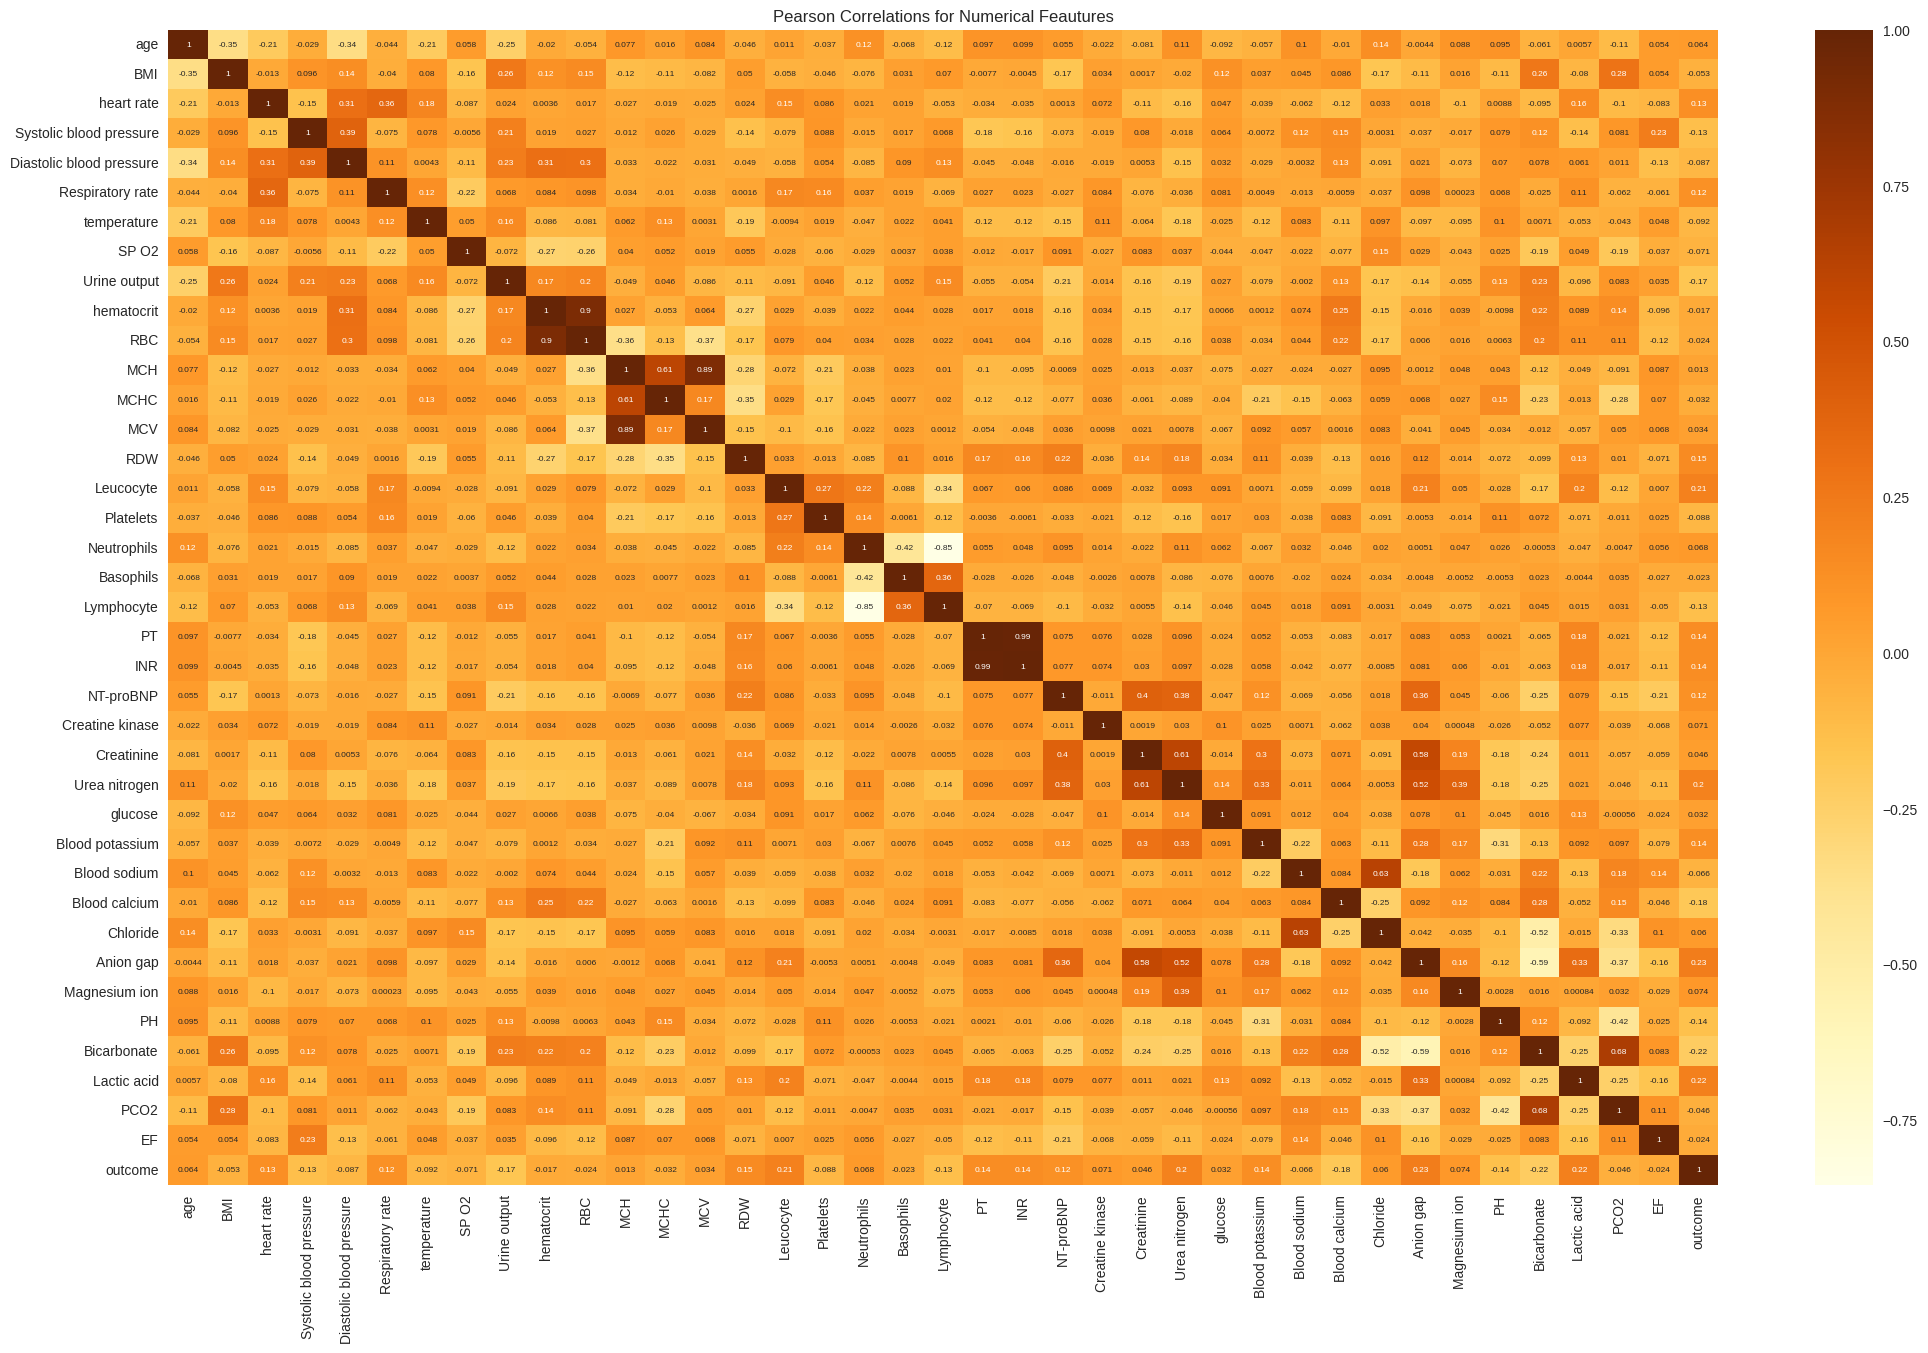

In [ ]:
cols = ['age', 'BMI', 'heart rate','Systolic blood pressure', 'Diastolic blood pressure','Respiratory rate', 'temperature',
        'SP O2', 'Urine output','hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte','Platelets', 'Neutrophils',
        'Basophils', 'Lymphocyte', 'PT', 'INR','NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen','glucose',
        'Blood potassium', 'Blood sodium', 'Blood calcium','Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF', 'outcome']
corr = df_final[cols].corr()
plt.figure(figsize=(25,15))
ax = sns.heatmap(corr, annot=True, cmap='YlOrBr', annot_kws={'size':6})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title('Pearson Correlations for Numerical Feautures')
plt.show()

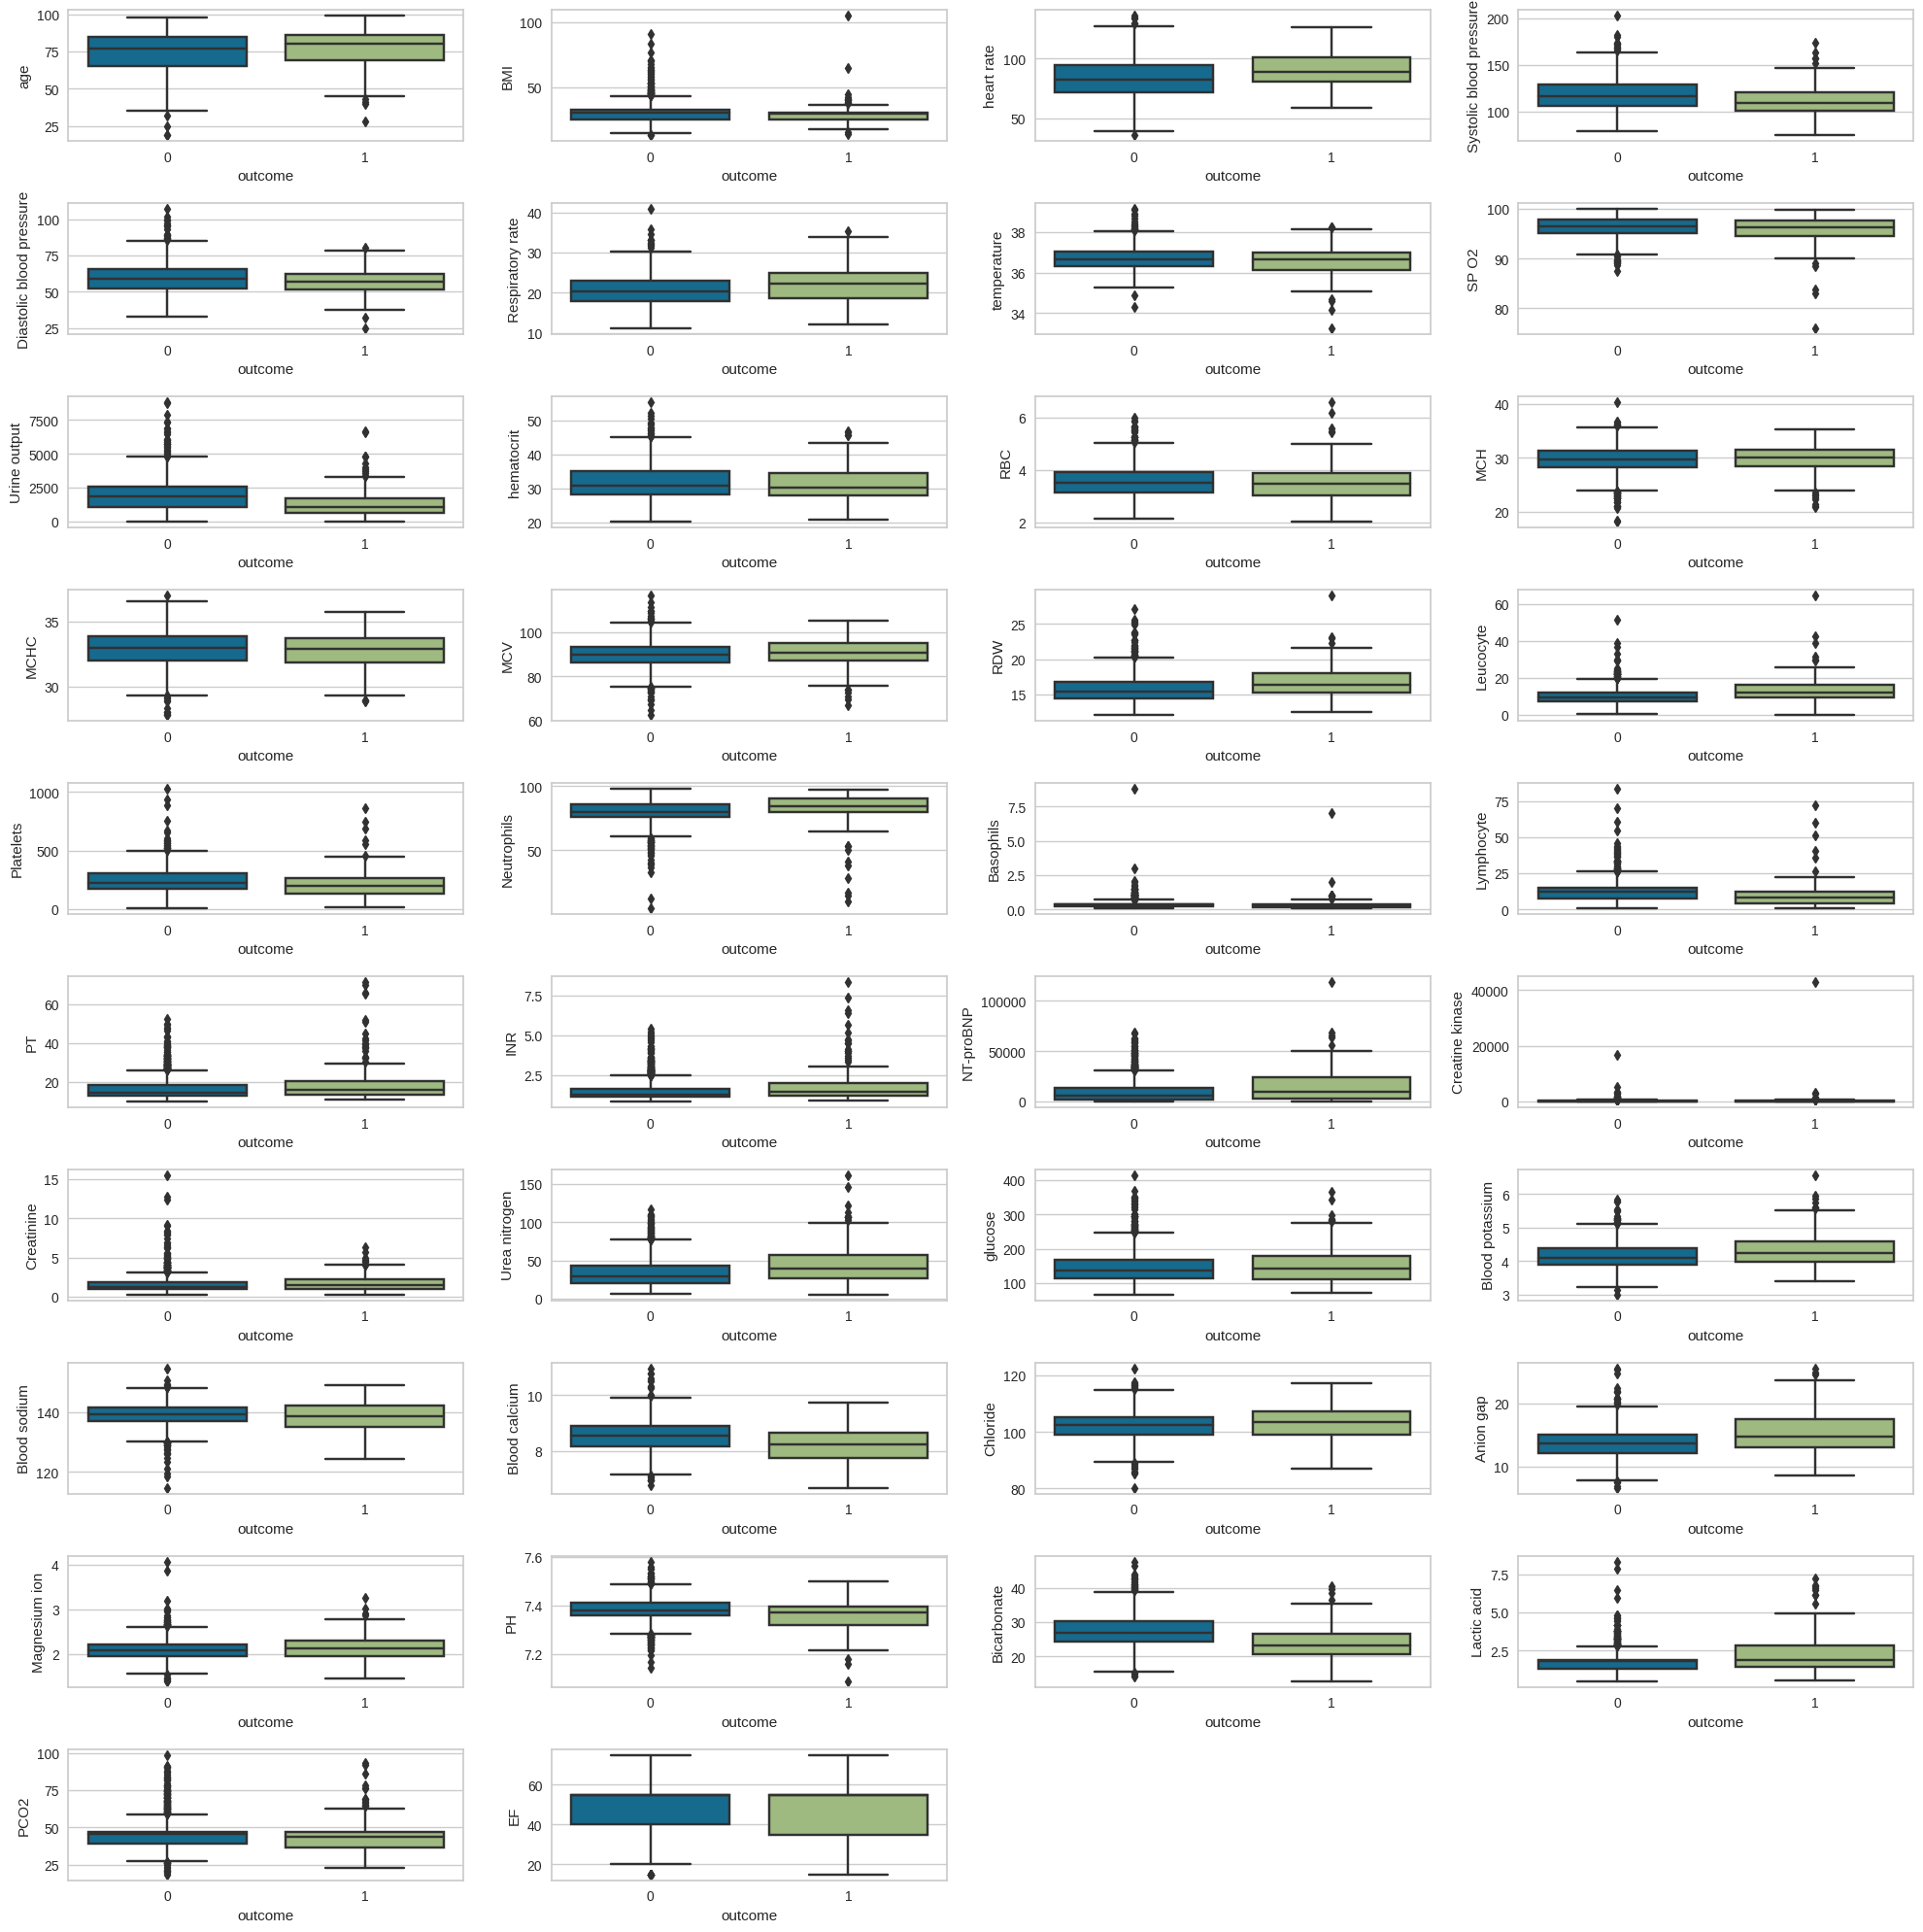

In [ ]:
features = ['age', 'BMI', 'heart rate','Systolic blood pressure', 'Diastolic blood pressure','Respiratory rate', 'temperature',
            'SP O2', 'Urine output','hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte','Platelets', 'Neutrophils',
            'Basophils', 'Lymphocyte', 'PT', 'INR','NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen','glucose',
            'Blood potassium', 'Blood sodium', 'Blood calcium','Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
            'Lactic acid', 'PCO2', 'EF']
#create box plots for each variable
fig, axes = plt.subplots(10,4, figsize=(20, 20))
axes = axes.flatten()
for i in range(len(features)):
    sns.boxplot(x="outcome", y=features[i], data=df_final, ax=axes[i])
plt.tight_layout()
fig.delaxes(axes[38])
fig.delaxes(axes[39])
plt.show()

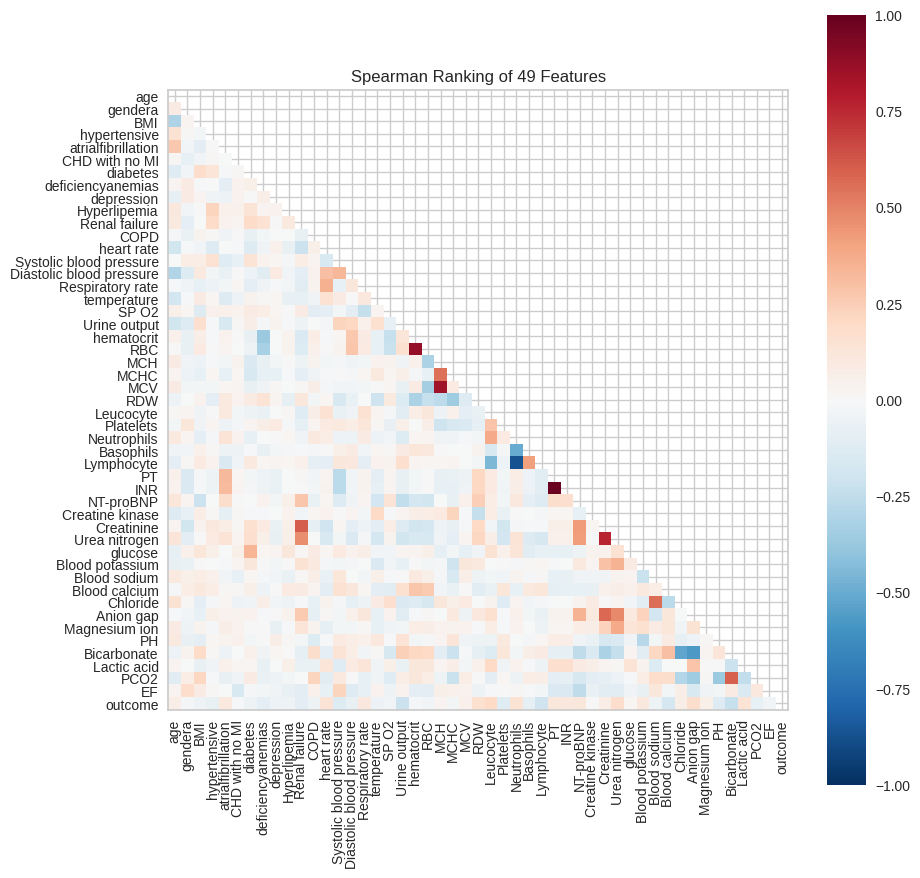

In [ ]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='spearman')
visualizer.fit_transform(df_final)
visualizer.show()
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (18,18)

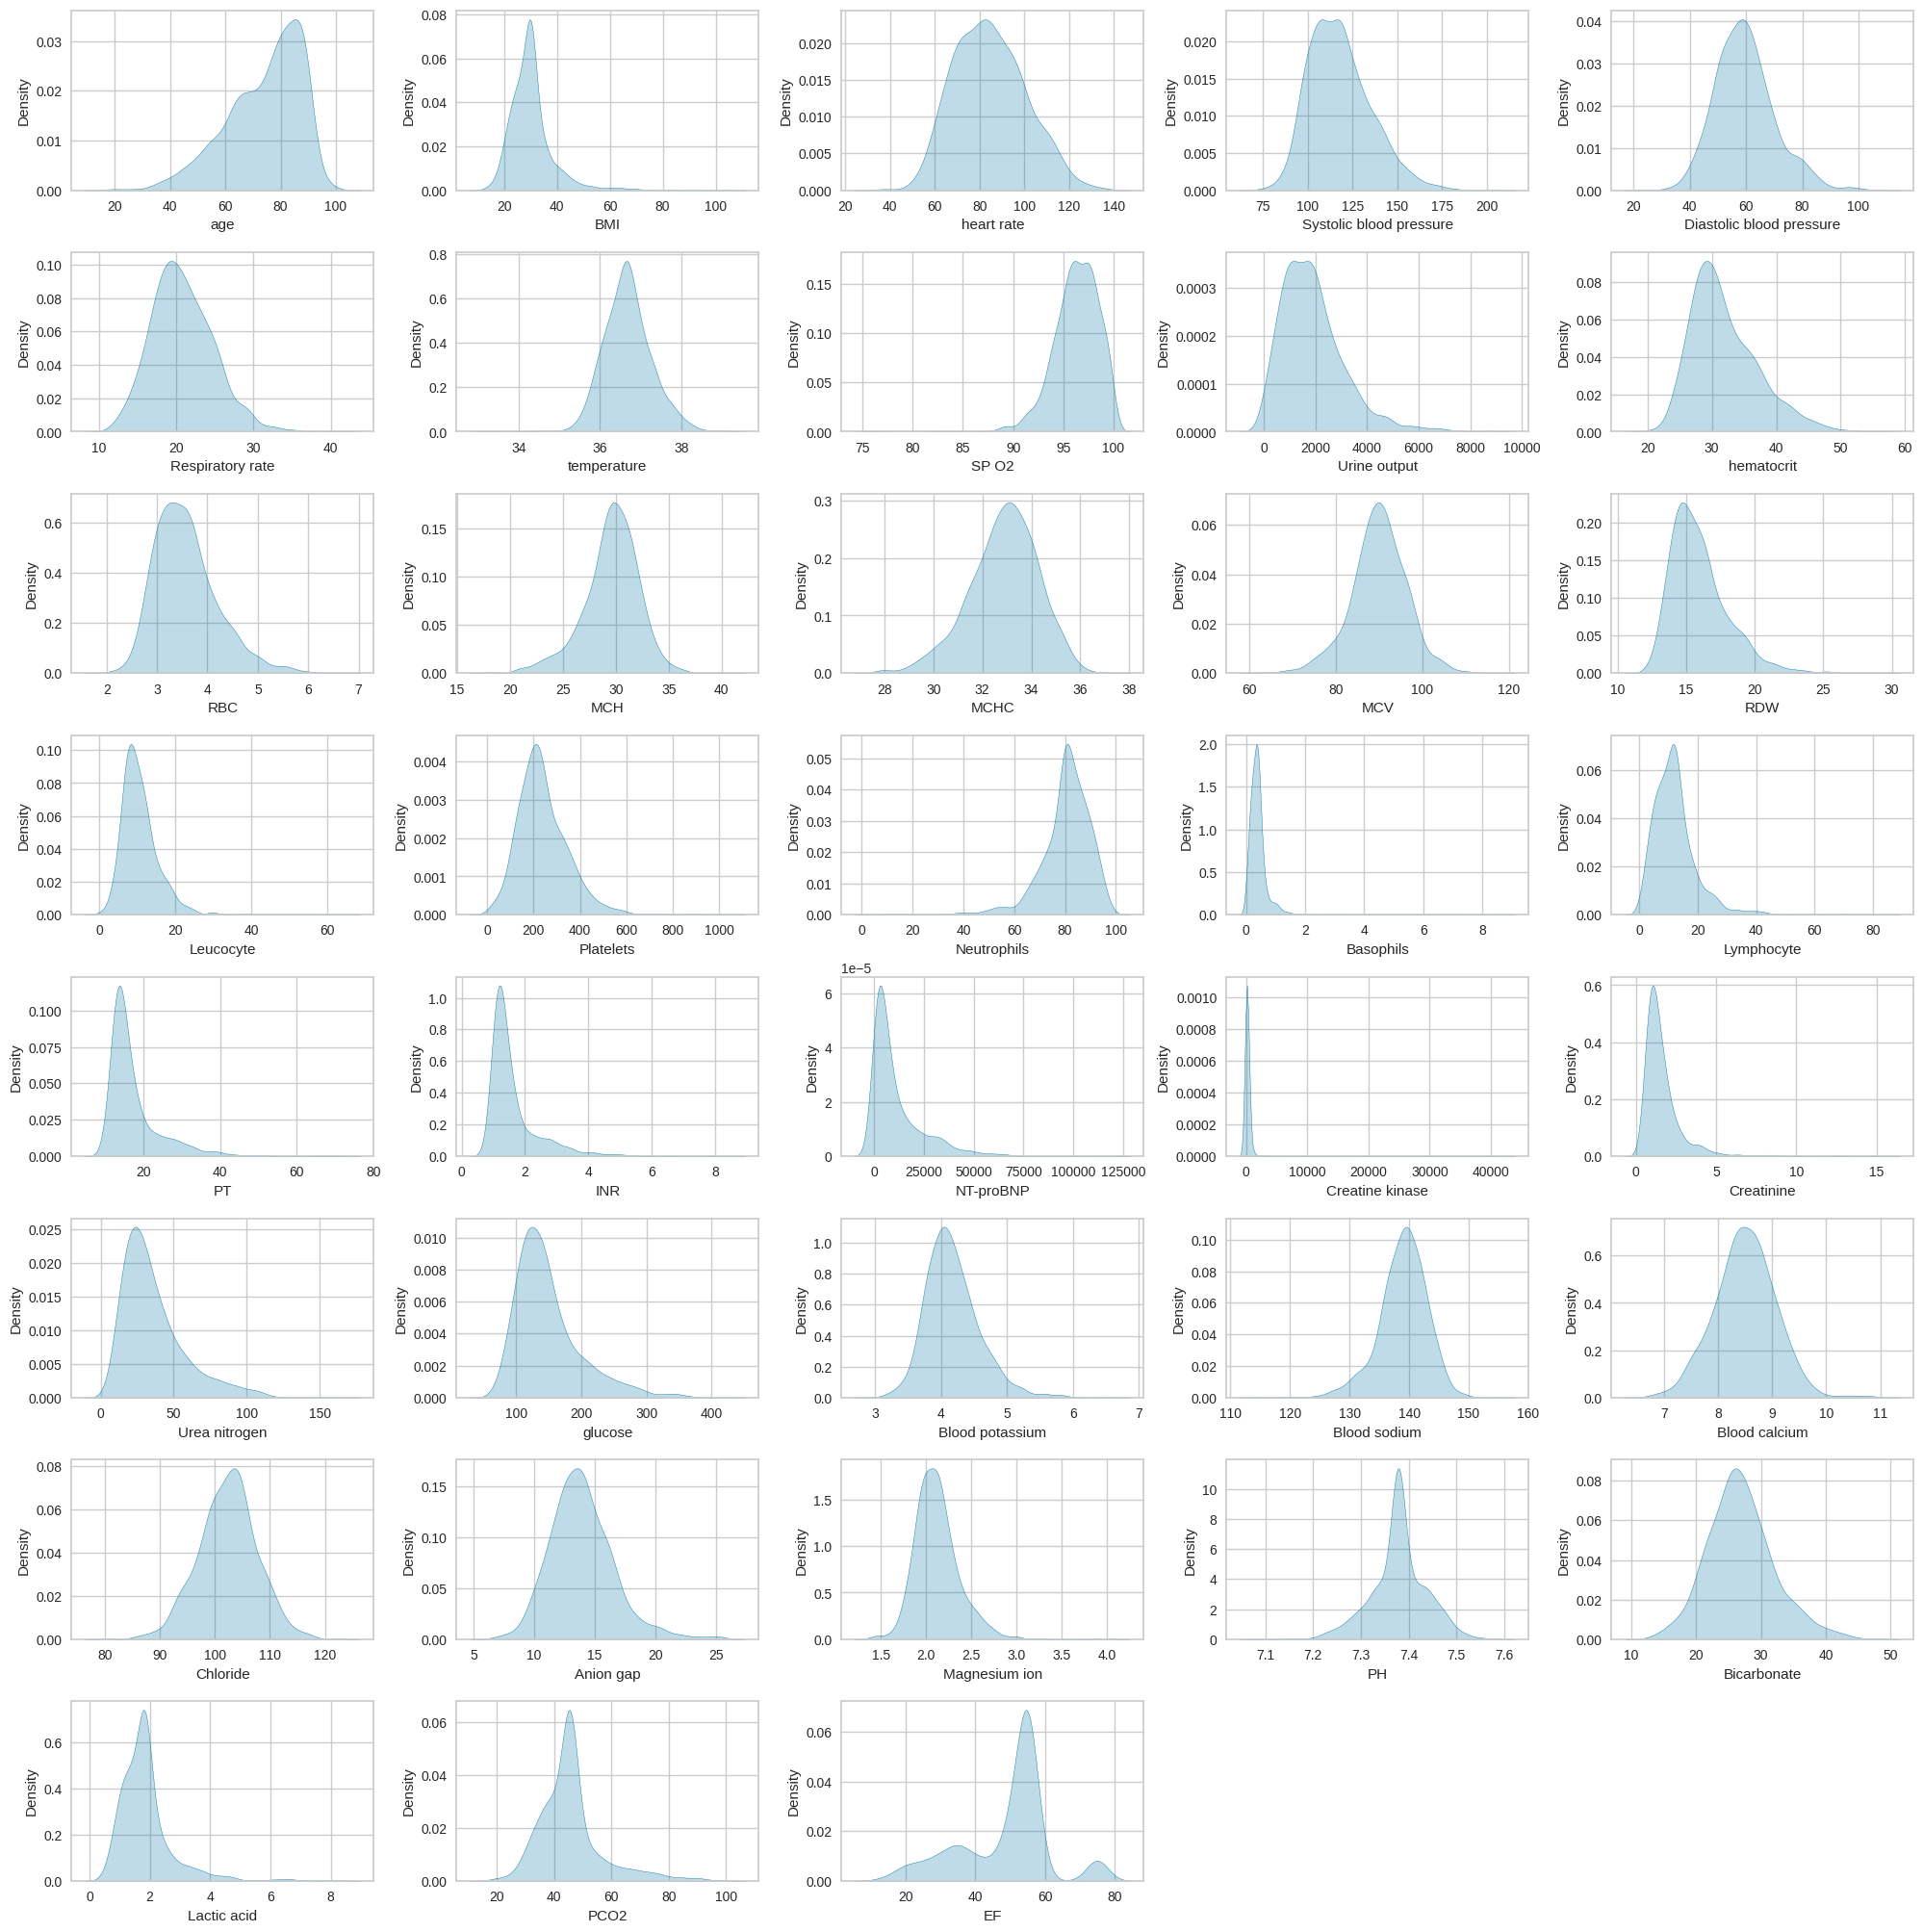

In [ ]:
cols = ['age', 'BMI', 'heart rate','Systolic blood pressure', 'Diastolic blood pressure','Respiratory rate', 'temperature',
        'SP O2', 'Urine output','hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte','Platelets', 'Neutrophils',
        'Basophils', 'Lymphocyte', 'PT', 'INR','NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen','glucose',
        'Blood potassium', 'Blood sodium', 'Blood calcium','Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']
fig, axes = plt.subplots(8,5, figsize=(20, 20))
axes = axes.flatten()
for i in range(len(cols)):
    sns.kdeplot(data=df_final[cols[i]], ax=axes[i], shade=True)
plt.tight_layout()
fig.delaxes(axes[38])
fig.delaxes(axes[39])
plt.show()

# PCA after scaling

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X = X.drop(columns = ['hematocrit', 'Lymphocyte', 'INR', 'MCV'])
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42)


In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

#X_train = mms.fit_transform(X_train)
#X_val = mms.transform(X_val)
#X_test = mms.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)


In [ ]:
#pca with scaling
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components = 40)
X_train_pca = pca.fit_transform(X_train)
#plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1] , alpha = 0.9, c = df_final.outcome, cmap= 'YlOrBr')
#plt.rcParams['figure.figsize'] = (8,8)
#plt.colorbar()

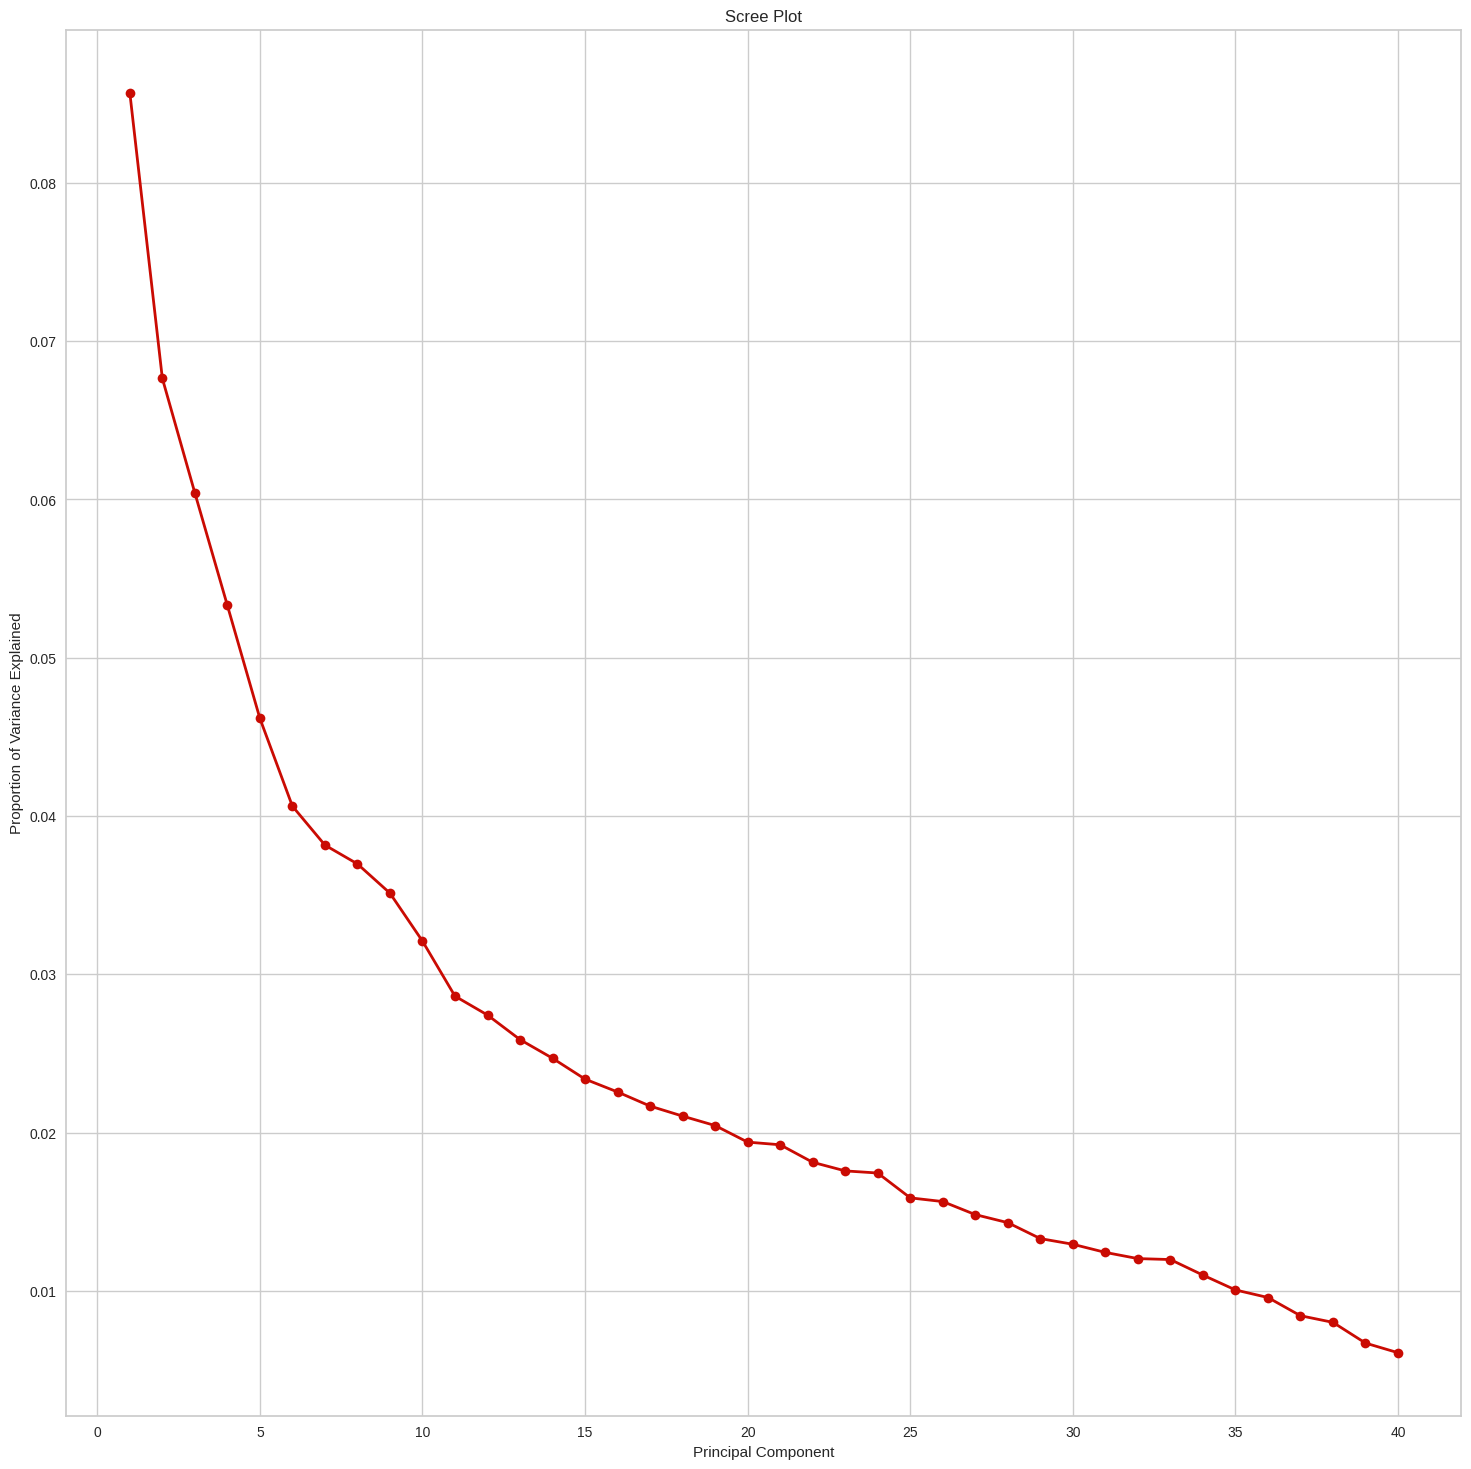

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)

out_sum = np.cumsum(pca.explained_variance_ratio_)
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.08568971 0.06765004 0.0604099  0.05330565 0.04617101 0.04062397
 0.038165   0.03697539 0.03512754 0.03210113 0.02862292 0.0274297
 0.02587804 0.02469974 0.02338144 0.0225697  0.02167809 0.02104534
 0.02044856 0.01940258 0.01923447 0.01812824 0.01758447 0.01745064
 0.01588163 0.01564726 0.01482396 0.01431495 0.01330837 0.01295078
 0.01243556 0.01204501 0.01198441 0.01100293 0.01006525 0.00958645
 0.00843678 0.00801675 0.00670761 0.00609904]
Cumulative Prop. Variance Explained:  [0.08568971 0.15333975 0.21374965 0.2670553  0.31322631 0.35385028
 0.39201528 0.42899067 0.46411821 0.49621934 0.52484226 0.55227196
 0.57815    0.60284974 0.62623118 0.64880088 0.67047897 0.69152431
 0.71197287 0.73137545 0.75060992 0.76873815 0.78632262 0.80377326
 0.81965489 0.83530215 0.85012611 0.86444106 0.87774943 0.89070021
 0.90313577 0.91518078 0.92716519 0.93816812 0.94823336 0.95781981
 0.96625659 0.97427334 0.98098095 0.98707999]


In [ ]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[3.77570288 2.98083007 2.66181112 2.34878012 2.03441026 1.78999347
 1.68164543 1.62922799 1.54780733 1.41445609 1.26119722 1.20862129
 1.14025109 1.08833219 1.03024472 0.99447744 0.95519069 0.92731051
 0.9010145  0.85492631 0.8475187  0.79877544 0.77481576 0.76891875
 0.69978439 0.68945726 0.65318081 0.63075246 0.58640015 0.57064368
 0.54794171 0.53073335 0.52806297 0.48481647 0.44350001 0.42240288
 0.3717456  0.35323792 0.29555391 0.26873914]


In [ ]:
components_to_retain = np.where(eigenvalues > 1)[0]
print("Principal Components to retain:", components_to_retain)

Principal Components to retain: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
